# Data Cleaning Exercise: Handling Missing Values and Outlier Detection

## Introduction
In this exercise, we will explore techniques for data cleaning, focusing on handling missing values and detecting outliers.
Data cleaning is a crucial step in data analytics to ensure high-quality data for analysis and modeling.


## Step 1: Importing Required Libraries
We start by importing the necessary Python libraries for data analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Step 2: Loading the Dataset
For this exercise, we will use a sample dataset with missing values and outliers.

In [7]:
# Creating a sample dataset
# np.random.seed(42)

file_path = "House_Data(in).csv"
# data = {
#     'Age': np.random.randint(18, 70, 50).tolist() + [200],  # Adding an outlier
#     'Salary': np.random.randint(30000, 100000, 50).tolist() + [500000],  # Adding an outlier
#     'Experience': np.random.randint(0, 40, 50).tolist() + [100],  # Adding an outlier
# }
df = pd.read_csv(file_path)

# Introducing some missing values
# df.loc[5, 'Age'] = np.nan
# df.loc[10, 'Salary'] = np.nan
# df.loc[15, 'Experience'] = np.nan

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
None
              area_type   availability       size  society total_sqft  bath  \
0  Super built-up  Area         19-Dec      2 BHK  Coomee        1056   2.0   
1            Plot  Area  Ready To Move  4 Bedroom  Theanmp       2600   5.0   
2        Built-up  Area  Ready To Move      3 BHK      NaN       1440   2.0   
3  Super built-up  Area  Ready To

## Step 3: Handling Missing Values
Missing values can be handled by either removing or imputing them. Let's explore both methods.

In [8]:
# Checking for missing values
df.isnull().sum()

area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

In [9]:
#Check for duplicated rows
df.duplicated().sum()


11

In [10]:
#Remove duplicates
df.drop_duplicates()
df.shape

(13320, 9)

## Step 4: Detecting Outliers
Outliers can be detected using various techniques such as boxplots and Z-scores.
We will use the IQR method and Z-score method.

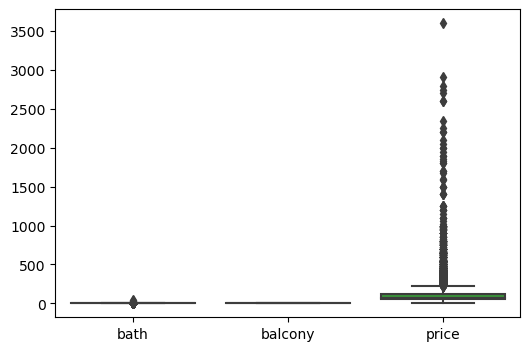

In [12]:
# Using Boxplot to visually identify outliers
plt.figure(figsize=(6, 4))
sns.boxplot(data=df)
plt.show()

In [16]:
# Detecting outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
df[outliers].dropna()

NameError: name 'numerical_columns' is not defined

In [15]:
# Removing outliers using the IQR method
df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_cleaned.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_11072\1335986483.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road
5,Super built-up Area,Ready To Move,2 BHK,DuenaTa,1170,2.0,1.0,38.00,Balaji Nagar


## Step 5: Conclusion
In this exercise, we:
- Loaded a dataset with missing values and outliers.
- Handled missing values by imputation.
- Used boxplots and the IQR method to detect and remove outliers.
Now, try experimenting with different datasets and methods to enhance your data cleaning skills!